## Discrete-Event Simulation Exercise

Discrete-event simulation queueing exercise from Law's Simulation Modeling and Analysis.

In [1]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import statistics 

In [2]:
def generate_inter_arrival():
    return np.random.exponential(1.0/3.0) # exponential distribution

In [3]:
def facility(env, server): 
    counter = 0
    while True:
        counter += 1
        yield env.timeout(generate_inter_arrival())
        env.process(customer(env, counter, server))   

In [4]:
def generate_service():
    return np.random.exponential(1.0/4.0) # exponential distribution

In [5]:
waiting_time = [] # create list to append wait times 

def customer(env, counter, server):
    with server.request() as request:
        arrival_time = env.now
        print(env.now, 'Customer {} arrives'.format(counter))
        yield request
        print(env.now, 'Customer {} being served'.format(counter))
        yield env.timeout(generate_service())
        print(env.now, 'Customer {} departs'.format(counter))
        depart_time = env.now
        waiting_time.append(depart_time - arrival_time)

In [6]:
env = simpy.Environment() # Create simpy environment

In [7]:
server = simpy.Resource(env, capacity = 1) # Create shared resource - server
env.process(facility(env, server))
np.random.seed(0) 
env.run(until = 25)

0.26529150272103663 Customer 1 arrives
0.26529150272103663 Customer 1 being served
0.49609728917205387 Customer 1 departs
0.683935090376316 Customer 2 arrives
0.683935090376316 Customer 2 being served
0.8216972131501907 Customer 2 departs
0.9463354744820729 Customer 3 arrives
0.9463354744820729 Customer 3 being served
1.0902152742742328 Customer 3 departs
1.2923885727966093 Customer 4 arrives
1.2923885727966093 Customer 4 being served
2.0335633771408284 Customer 5 arrives
2.121116618310063 Customer 4 departs
2.121116618310063 Customer 5 being served
2.1947640774415795 Customer 6 arrives
2.445655447287109 Customer 7 arrives
2.513340653302355 Customer 5 departs
2.513340653302355 Customer 6 being served
2.72546639620005 Customer 8 arrives
2.7500281811709995 Customer 9 arrives
2.780415190877333 Customer 10 arrives
2.787223719772075 Customer 11 arrives
3.162904191783715 Customer 6 departs
3.162904191783715 Customer 7 being served
3.3830529463103707 Customer 12 arrives
3.5393502497500187 Cus

# Statistics

In [8]:
print('Mean waiting time:', statistics.mean(waiting_time))
print('Median:', statistics.median(waiting_time))

Mean waiting time: 0.7927110264123092
Median: 0.7166482915265027


Text(0, 0.5, 'Customers')

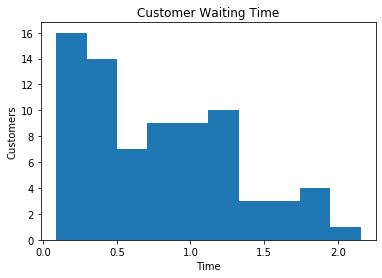

In [9]:
plt.hist(waiting_time)
plt.title('Customer Waiting Time')
plt.xlabel('Time')
plt.ylabel('Customers')